In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("../../data/telecom_churn.csv")

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [8]:
data['International plan'] = data['International plan'].map({ 'No' : 0, 'Yes' : 1})

In [11]:
y = data['Churn'].astype('int')

In [12]:
X = data.drop(['Churn'], axis=1,)

In [13]:
X.shape, y.shape

((3333, 17), (3333,))

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [21]:
y_train.shape, X_train.shape

((2333,), (2333, 17))

In [22]:
first_tree = DecisionTreeClassifier(random_state=17)

In [28]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
first_knn = KNeighborsClassifier()

In [33]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

In [35]:
# настройка максимальной глубины для дерева

In [36]:
from sklearn.model_selection import GridSearchCV

In [42]:
tree_params = { 'max_depth' : np.arange(1, 11), 'max_features' : [0.5, 1]}

In [44]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [45]:
%%time
tree_grid.fit(X_train, y_train)

Wall time: 3.75 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.5, 1], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
tree_grid.best_score_, tree_grid.best_params_

(0.9374196313759109, {'max_depth': 6, 'max_features': 0.5})

In [47]:
# настройка knn

In [48]:
knn_params = {'n_neighbors' : [1, 2, 3, 4] + list(range(50, 100))}

In [49]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [50]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
knn_grid.best_score_, knn_grid.best_params_

(0.8658379768538362, {'n_neighbors': 4})

In [52]:
knn_params_small = {'n_neighbors' : range(1, 40)}

In [53]:
knn_grid_small = GridSearchCV(first_knn, knn_params_small, cv=5)

In [54]:
%%time
knn_grid_small.fit(X_train, y_train)

Wall time: 50.7 s


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
knn_grid_small.best_score_, knn_grid_small.best_params_

(0.8731247321045864, {'n_neighbors': 9})

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
def plot_cv_results(results, parameter_name='n_neighbors'):
    xs = []
    ys = []
    for row in results:
        xs.append(row[0][parameter_name])
        ys.append(row[1])
    _ = plt.plot(xs, ys)

C:\Python27\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


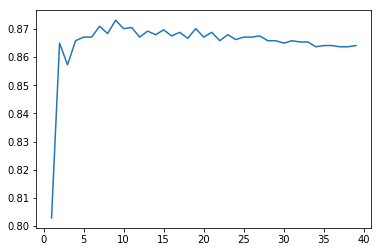

In [69]:
plot_cv_results(knn_grid_small.grid_scores_)

In [87]:
tree_valid_pred = tree_grid.predict(X_valid)

In [88]:
tree_grid.score(X_valid, y_valid)

0.942

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_valid, tree_valid_pred)

0.942

In [92]:
1 - np.mean(y_valid)

0.867

In [93]:
from sklearn.tree import export_graphviz

In [94]:
export_graphviz(tree_grid.best_estimator_, out_file='telecom_tree.dot', feature_names=X.columns, filled=True)

In [96]:
!ls -l *.dot

-rw-r--r--    1 Admin    Админист     9122 Feb 24 20:22 telecom_tree.dot


In [97]:
!dot -Tpng telecom_tree.dot -o telecom_tree.png

<img src='telecom_tree.png'>

In [99]:
# второе дерево для визуализации

In [102]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.905

In [104]:
export_graphviz(second_tree, out_file='telecom_min.dot', feature_names=X.columns, filled=True)

In [105]:
!ls -l *.dot

-rw-r--r--    1 Admin    Админист     1760 Feb 24 20:30 telecom_min.dot
-rw-r--r--    1 Admin    Админист     9122 Feb 24 20:22 telecom_tree.dot


In [106]:
!dot -Tpng telecom_min.dot -o telecom_min.png

<imp src='telecom_min.png'>

<img src='telecom_min.png'>